# Exercício Programa 1 - MAC0209 - Modelagem e Simulação 
## Grupo: Eduardo Nascimento, Gabriel Massukado, Larissa Goto, Nathalia Borin, Matheus Lima


Como primeiro projeto para a disciplina MAC0209, tivemos que simular e modelar situações físicas de movimento retilíneo uniforme (MRU) e uniformemente variado (MRUV).

Para isso, selecionamos 3 membros do grupo que seriam responsáveis pelas travessias. Delimitamos os 30m utilizando uma trena e marcamos com giz cada intervalo de 5m. Para garantir a consistência no tamanho dos passos dos membros do grupo, também fizemos marcas a cada 60cm.

Durante o MRU, cada membro manteve sua velocidade constante usando um metrônomo sincronizado com seus passos. Já durante o MRUV, utilizamos um software de edição de áudio (Audacity) para aumentar o ritmo do metrônomo com o passar do tempo, assegurando aceleração constante durante o processo.

Além disso, todos os membros realizaram as travessias com acelerômetros em suas mãos para medir a resultante de forças durante o processo.

Cada membro realizou 3 travessias para cada tipo de movimento, sendo a primeira e a segunda com marcações de tempo a cada 10m e a terceira com marcações a cada 5m. Em cada posição de marcação de tempo, foram posicionados 2 cronômetros operados por outros membros do grupo, que os acionavam imediatamente após o caminhante atravessar a marca no chão. Antes do início de cada travessia, o membro realizando a caminhada aguardou 5 segundos para que houvesse uma referência do acelerômetro sem deslocamento. O mesmo procedimento foi repetido após o final do percurso.

A seguir apresentamos os algoritmos que utilizamos para criar os gráficos referentes aos testes e os resultados obtidos.

O primeiro bloco de código é composto pelas funções auxiliares <span style="color: blue">uniforme</span>() e <span style="color: blue">acelerado</span>() e pela função <span style="color: blue">plotar</span>(). As duas primeiras são funções auxiliares que calculam a posição esperada de acordo com o tempo amostrado pelos cronômetros e a velocidade do corpo em movimento uniforme e a posição esperada de acordo com o tempo amostrado, a velocidade e a aceleração de um corpo em movimento uniformemente acelerado, respectivamente.

Já a terceira é a função responsável por desenhar todos os gráficos, que recebe os dados necessários na forma de uma matriz de dados, como a construída em sala, e também um vetor com os títulos de cada gráfico a ser construído. Além disso, ela recebe dois parâmetros que indicam se o movimento realizado foi uniforme ou acelerado e também se os tempos foram marcados em intervalos de 10 em 10 ou de 5 em 5 metros. Ela imprime os gráficos correspondentes, representando tanto o movimento real que ocorreu quanto o movimento ideal calculado por método analítico. Além disso, imprime também os valores de erro (em módulo) entre os valores reais e ideais. Finalmente, a função calcula e retorna ou a velocidade média ou a aceleração média, dependendo dos parâmetros recebidos.

Além disso, também são importadas as bibliotecas que utilizamos em nossos algoritmos: *numpy* para operações matemáticas, *pandas* para a leitura dos arquivos ".csv" que continham os dados dos experimentos e *matplotlib.pyplot* para desenhar os gráficos.


In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

#retorna a posição em função do tempo e velocidade para o MU
def uniforme(v, t, ac):
    return v*t

#retorna a posição em função do tempo, velocidade 
#e aceleração para o MUV
def acelerado(v, t, ac):
    return v*t + 0.5*ac*t**2

#função para plotar os gráficos: recebe um Dataframe contendo os dados,
#uma lista de títulos para cada gráfico, o tipo de movimento e uma flag
#alt, que indica que os dados foram amostrados pelos cronômetros alternados
#sobreposto, indica se o gráfico sera sobreposto aos dados do acelerômetro
def plotar(dados, titulos, tipo, alt, vi=[],sobreposto = False):
    vm = []
    times = []
    realespaco = []
    erros = []
    ac = []
    if alt:
        espaco = [0,5,10,15,20,25,30]
    else:
        espaco = [0,10,20,30]
        
    x = dados.as_matrix().transpose()

    if alt:
        casos = len(x)
    else:
        casos = int(len(x)/2)
    v = []
    #laço que realiza a soma dos tempos
    #no caso dos cronômetros pareados, antes de somar,
    #calculamos a média entre o tempo das duas amostras
    i=0
    while i<len(x):
        mean = 0
        for j in range(len(x[0])):
            if alt:
                time = x[i][j]
            else:
                time = (x[i][j] + x[i+1][j])/2
            mean += time
            times.append(mean)
        #calcula a velocidade média para cada travessia
        vm.append(espaco[-1]/mean)
        if alt:
            i=i+1
        else:
            i=i+2
    
    #calcula a aceleração média para cada travessia
    for i in range(casos):
        pessoa = int(i/2)
        if tipo == acelerado:
            ac.append((vm[i]-vi[pessoa])/times[i+(len(espaco)-1)*(i+1)])
        else:
            ac.append(0)
    
    #para os tempos amostrados pelos cronômetros, calcula
    #a posição esperada analíticamente
    for i in range(casos):
        for j in range(len(espaco)):
            realespaco.append(tipo(vm[i],times[j],ac[i])) 
            
    #calcula os erros
    for i,j in zip(realespaco, espaco*casos):
        erros.append(abs(i-j))

    #plota os gráficos
    for i in range(casos):
        #plota o gráfico do acelerômetro e o gráfico da travessia a partir do tempo de início efetivo
        if sobreposto:
            xinicio = acelerometro(x,titulos[i])
            t= len(espaco)*i
            while t < len(espaco)*(i+1):
                times[t] += xinicio
                t = t+1
        
        pyplot.rcParams["figure.figsize"] = [9,6]
        pyplot.figure(5)
        pyplot.xlabel('Tempo (s)')
        pyplot.ylabel('Espaco (m)')
        pyplot.title(titulos[i])
        pyplot.plot(times[len(espaco)*i:len(espaco)*(i+1)],espaco,marker='o')
        pyplot.plot(times[len(espaco)*i:len(espaco)*(i+1)],realespaco[len(espaco)*i:len(espaco)*(i+1)],marker='*')
        pyplot.show()
        print("Erros: {}".format(erros[len(espaco)*i:len(espaco)*(i+1)]))
    
    if tipo == uniforme:    
        return vm
    else:
        return ac
    
#Função que plota o gráfico csv do acelerômetro, além disso a função
#tenta identificar os pontos, marcados de vermelho, de início e fim 
#das travessias através das variações da força resultante. Para isso é 
#calculada uma média da força resultante a cada 500 elementos e verifica a maior diferença positiva
#(quando, teoricamente, se inicia o andar) e a maior diferença negativa
#(quando, teoricamente, a pessoa para e a resultante diminui).
#A função retorna o tempo de início da travessia para a futura sobreposição dos gráficos.
def acelerometro(x,filename):
        file = filename+'.csv'
        uniforme = pd.read_csv(file, sep=';', decimal=',')
        tempoelementos = [0]
        mediaelementos = [0]
        media = 0
        maxdif = 0
        mindif = 0
        xmaxdif = 0
        ymaxdif = 0
        xmindif = 0
        ymindif = 0
        num = 0
        x = uniforme.as_matrix()
        tempos = []
        realtimes = []
        forca = []
        erros = []
        linhas = len(x)
        n = 500
        j=0
        while j<linhas:
             media += x[j][4]
             num += 1
             if num == n:    
                media = media/n
                mediaelementos.append(media)
                tempoelementos.append(x[j][0])
                if (mediaelementos[-1] - mediaelementos[-2] > maxdif) & (x[j][0] < 15.0) & (x[j][0] > 2.0):
                    maxdif  = mediaelementos[-1] - mediaelementos[-2]
                    ymaxdif = mediaelementos[-2]
                    xmaxdif = tempoelementos[-2]
                if (mediaelementos[-1] - mediaelementos[-2] < mindif) & (x[j][0] > 30.0):
                    mindif = mediaelementos[-1] - mediaelementos[-2]
                    ymindif = mediaelementos[-1]
                    xmindif = tempoelementos[-1]
                media = 0
                num = 0
             tempos.append(x[j][0])
             forca.append(x[j][4])
             j = j + 1

        pyplot.rcParams["figure.figsize"] = [9,6]
        pyplot.figure(5)
        pyplot.xlabel('Tempo')
        pyplot.ylabel('Resultante')
        pyplot.title('Acelerometro')
        pyplot.plot(tempos[0:-1],forca[0:-1],marker='.',color = 'darkcyan')
        pyplot.plot(xmaxdif,ymaxdif,marker = 'o',color = 'red')
        pyplot.plot(xmindif,ymindif,marker = 'o',color = 'red')
        return xmaxdif

## Movimento Retilíneo Uniforme

O segundo bloco de código constrói os gráficos de movimento retilíneo uniforme de posição por tempo com medições de tempo de 10 em 10 metros. Além disso, ele inicializa uma variável "vtemp", que será utilizada para agrupar todas as velocidades médias e construir os gráficos finais.

A linha azul representa as posições amostradas pelos cronômetros, enquanto os pontos da linha laranja foram calculados analíticamente com base na velocidade média calculada em cada travessia.

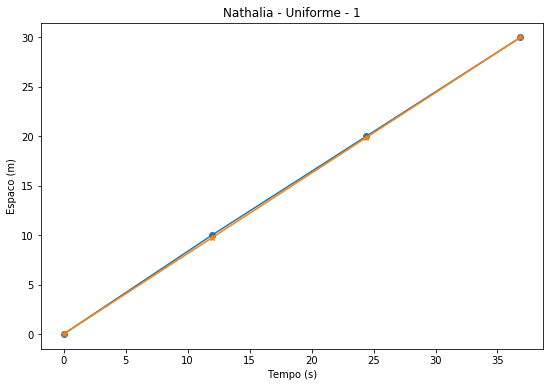

Erros: [0.0, 0.26190799294341005, 0.12484733342380139, 0.0]


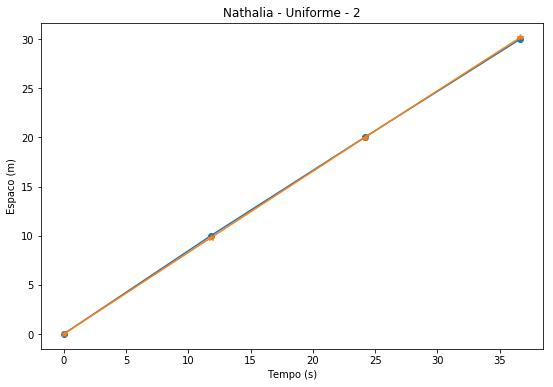

Erros: [0.0, 0.21009549795361515, 0.019099590723055115, 0.1596180081855394]


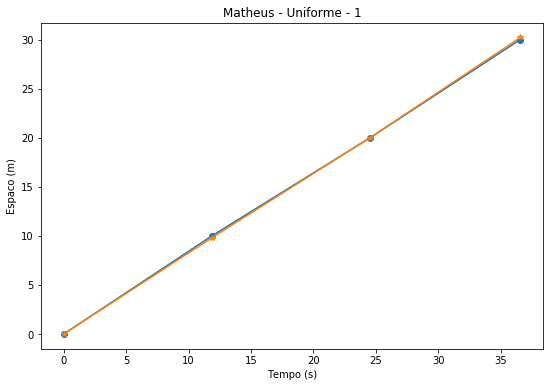

Erros: [0.0, 0.1927019270192698, 0.01640016400164157, 0.2132021320213191]


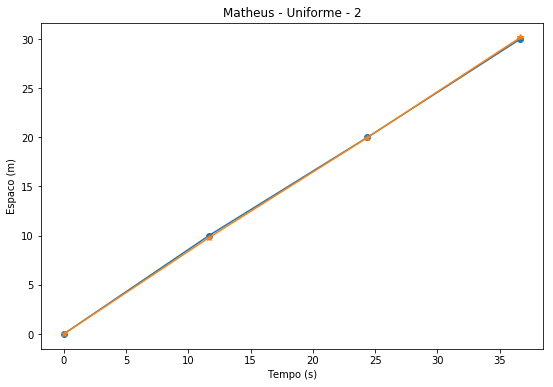

Erros: [0.0, 0.21143090983494695, 0.021825126176512555, 0.1555040240076373]


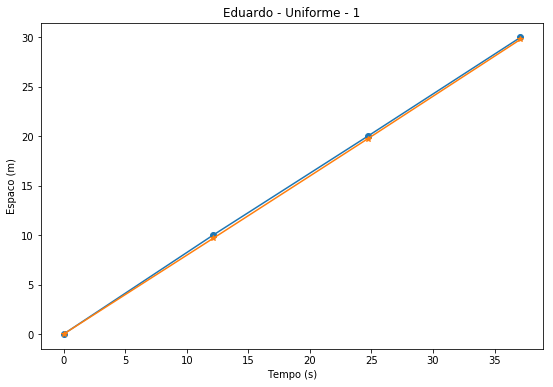

Erros: [0.0, 0.32753740396279696, 0.2587949858471461, 0.20218358269308467]


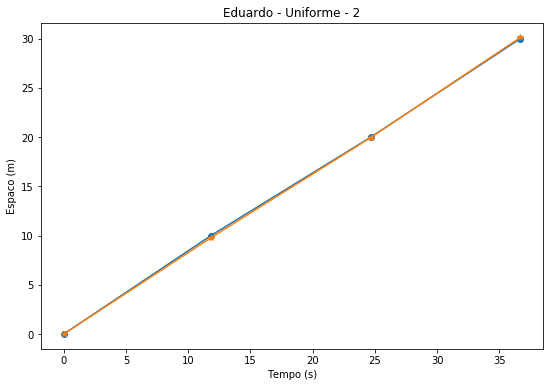

Erros: [0.0, 0.22210110369259972, 0.043602670663577925, 0.12263251124131358]


In [132]:
titulos = ["Nathalia - Uniforme - 1","Nathalia - Uniforme - 2",
           "Matheus - Uniforme - 1", "Matheus - Uniforme - 2",
           "Eduardo - Uniforme - 1", "Eduardo - Uniforme - 2"]
uniforme_dados = pd.read_csv('uniforme.csv', sep='\t', decimal=',')

vtemp = plotar(uniforme_dados, titulos, uniforme, False)

O terceiro bloco de código constrói os gráficos de movimento retilíneo uniforme de posição por tempo com medições de tempo de 5 em 5 metros, além de atualizar o valor de "vtemp".

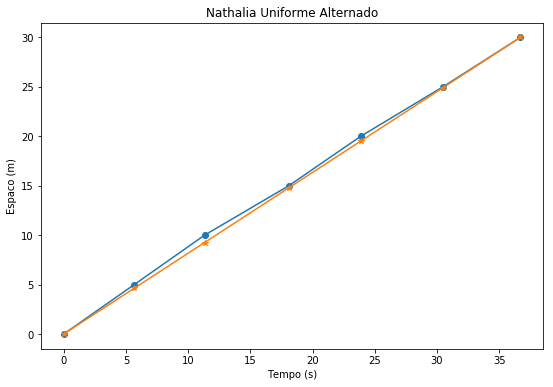

Erros: [0.0, 0.36512261580381455, 0.746594005449591, 0.21253405994550434, 0.4877384196185268, 0.09264305177111964, 0.0]


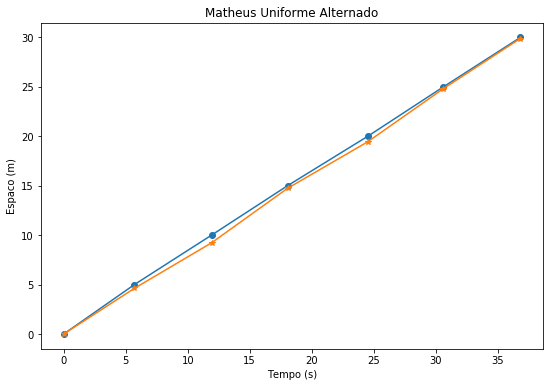

Erros: [0.0, 0.38148248710290567, 0.7792560412707026, 0.2647298398045077, 0.5566114580505008, 0.18055932663589758, 0.10589193592180024]


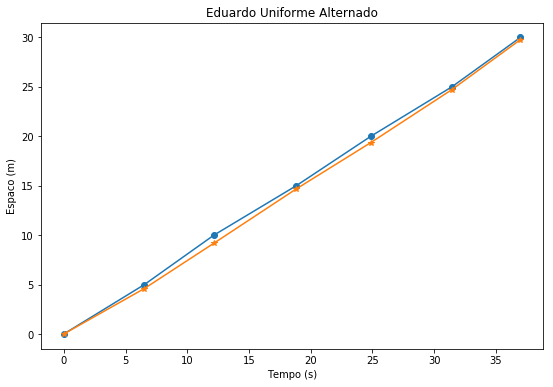

Erros: [0.0, 0.4002163331530548, 0.8166576527852882, 0.32449972958355744, 0.6354786371011336, 0.28123309897241455, 0.22714981070848594]


In [133]:
titulos_alt = ["Nathalia Uniforme Alternado", "Matheus Uniforme Alternado",
              "Eduardo Uniforme Alternado"]
alternado = pd.read_csv('uniforme_alternado.csv', sep='\t', decimal=',')

vtemp += plotar(alternado, titulos_alt, uniforme, True)


O quarto bloco de código constrói os gráficos posição x tempo baseado na velocidade média de cada membro do grupo que realizou a travessia, concluindo assim os gráficos de movimento retilíneo uniforme. Calcula também a velocidade média de todos os membros.

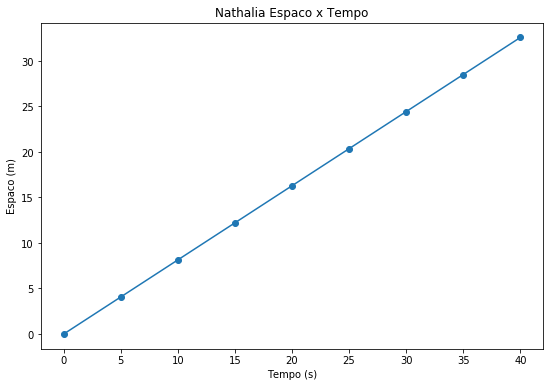

Velocidade média = 0.8146749839367718  m/s


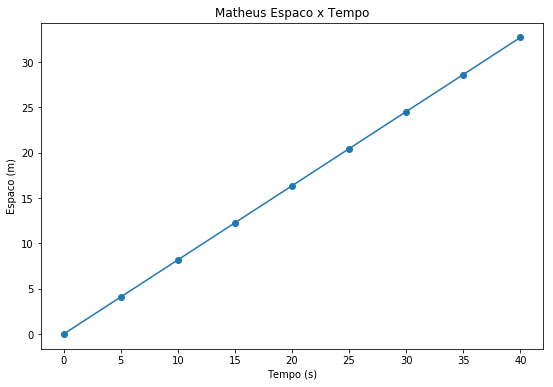

Velocidade média = 0.8176679283152634  m/s


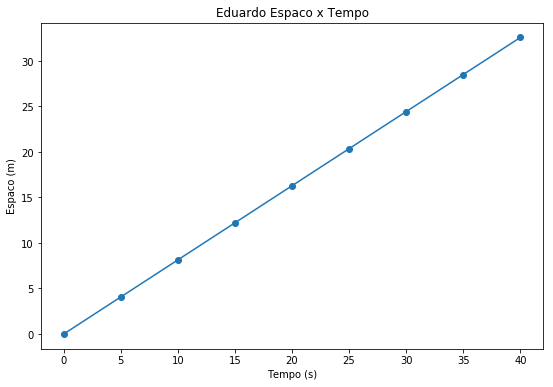

Velocidade média = 0.8145743659375081  m/s

Velocidade média de todo mundo = 0.8156390927298478 m/s


In [134]:
vm_pessoa = []
tempo = [0,5,10,15,20,25,30,35,40]

titulos_pessoa = ["Nathalia Espaco x Tempo", "Matheus Espaco x Tempo", "Eduardo Espaco x Tempo"]

#calcula a velocidade média de cada um
for i in range(len(titulos_pessoa)):
    temp = 0
    temp+=vtemp[-(i+1)]
    for j in range(2):
        temp += vtemp[j+2*i]
    vm_pessoa.append(temp/3)

vm_todos = 0.0
    
#calcula a velocidade média de todos
for i in vm_pessoa:
    vm_todos += i
vm_todos = vm_todos/3

#encontra os posições esperadas
espaco_pessoa = []
for x in vm_pessoa:
    for y in tempo:
        espaco_pessoa.append(x*y)
        
#plota o gráfico
for i in range(len(titulos_pessoa)):
    pyplot.rcParams["figure.figsize"] = [9,6]
    pyplot.figure(5)
    pyplot.xlabel('Tempo (s)')
    pyplot.ylabel('Espaco (m)')
    pyplot.title(titulos_pessoa[i])
    pyplot.plot(tempo,espaco_pessoa[i*len(tempo):(i+1)*len(tempo)],marker='o')
    pyplot.show()
    print("Velocidade média = {}  m/s".format(vm_pessoa[i]))
print("")
print("Velocidade média de todo mundo = {} m/s".format(vm_todos))



## Análise - Movimento Retilíneo Uniforme

Para analisar os resultados dos gráficos de MRU, foi escolhido um valor de 1,8m como o erro máximo aceitável, valor que corresponde a 6% da distância total a ser percorrida ou a 3 passos de um membro durante a travessia.

A partir desse valor, pode-se afirmar que todas as tentativas de movimento uniforme foram precisas em manter sua velocidade constante. Nenhum dos valores de erro comparando a posição real com a posição obtida analiticamente superou uma diferença de 1 metro, podendo confirmar que os métodos para simular o MRU foram eficazes. 

Entretanto, vale notar que a margem de erro aumentou nas simulações com medidas de 5 em 5 metros. Isso provavelmente se deve a um fator de erro humano e a um fator de aumento de precisão das medidas, sem alteração no método de simulação. 

O primeiro caso se resume no fato de que, durante essas simulações, havia apenas um cronômetro em cada marcação de 5 metros, ao invés dos dois cronômetros utilizados anteriormente - desse modo, uma medida imprecisa de um dos cronômetros não pode ser identificada e comparada com a outra medição na mesma posição, permitindo deslizes maiores. Já o segundo caso remete ao fato de que, caso houvesse alguma falha ou imprecisão no método que desenvolvemos para simular o MRU que não havia sido relevante anteriormente, com um número maior de medidas os erros possíveis tornam-se mais evidentes.

Finalmente, considerando que a velocidade teórica que os membros do grupo deveriam se aproximar era de 0.8m/s (calculada no sistema abaixo), podemos observar que as velocidades diferem em 1.83% (Nathalia), 2.21% (Matheus) e 1.82% (Eduardo) e podemos concluir que para um valor de erro médio de 3%, nossas aproximações foram precisas.

<center><b>Sistema para determinar a velocidade média (utilizando passos de 0,6m e 80bpm do metrônomo):</b></center>
$$80 bpm = \frac{80}{60} bps$$
$$ \frac{80}{60} bps * 0.6m = 0.8m/s$$

## Movimento Retilíneo Uniformemente Variado

O quinto bloco constrói os gráficos de posição por tempo com medições de tempo de 10 em 10 metros. Ademais, é inicializada uma variável "actemp" para guardar as acelerações em cada travessia, que será usada no futuro.

Novamente, a linha azul representa as posições amostradas pelos cronômetros, enquanto os pontos da linha laranja foram calculados analíticamente com base na aceleração média calculada em cada travessia.

É importante notar o uso do parâmetro adicional vm_pessoa, construído nos blocos anteriores. Para nosso cálculo da aceleração média do movimento acelerado, estamos considerando a velocidade inicial $ v_i $ de cada pessoa como sendo sua velocidade média na simulação do movimento uniforme.

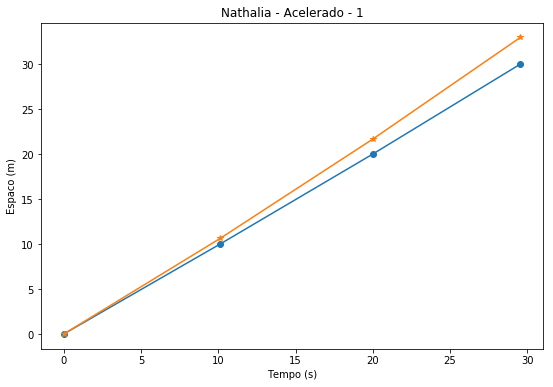

Erros: [0.0, 0.6216507694989861, 1.6619522332261738, 2.9631771123341935]


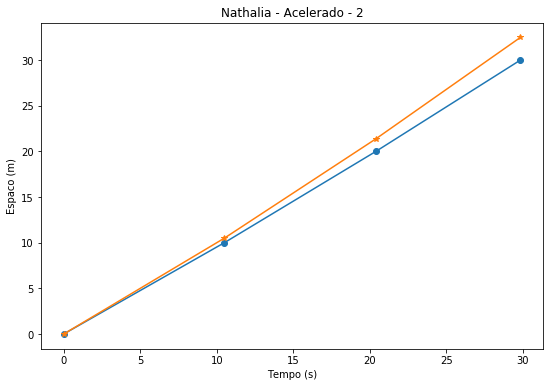

Erros: [0.0, 0.497396910405973, 1.3758803463408285, 2.482650244560425]


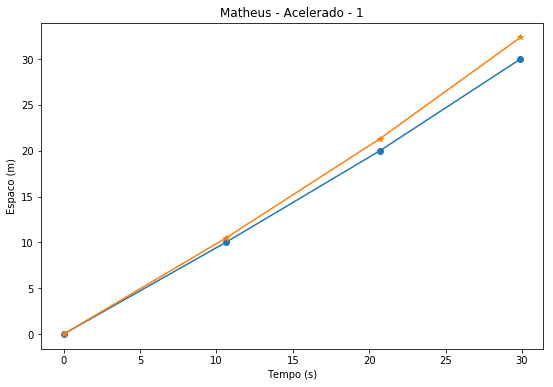

Erros: [0.0, 0.4718386755731174, 1.3088732661544356, 2.360087466961339]


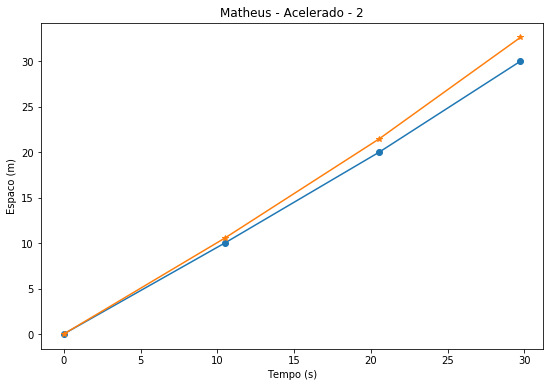

Erros: [0.0, 0.539535104110783, 1.464564507710186, 2.6214032426505014]


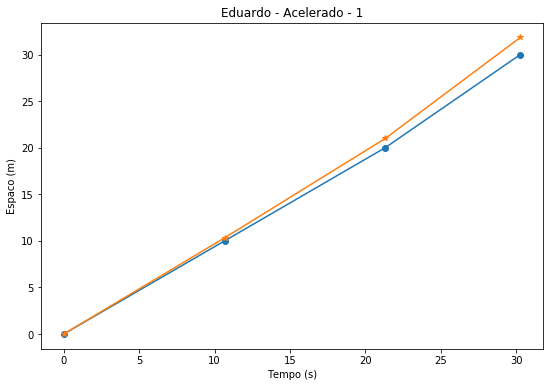

Erros: [0.0, 0.3283241993620667, 0.9878157354804777, 1.832266323807577]


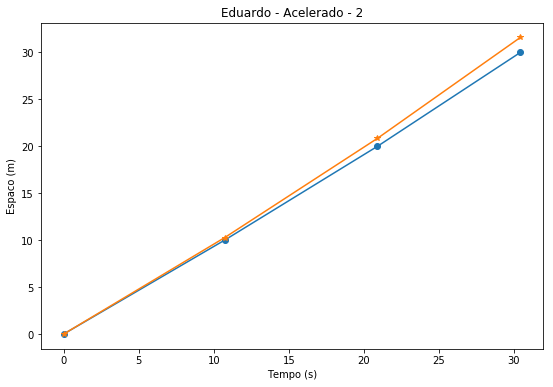

Erros: [0.0, 0.26720873093415776, 0.8477032597179672, 1.5976426850217749]


In [135]:
acelerado_dados = pd.read_csv('acelerado.csv', sep='\t', decimal=',')
titulos_ac = ["Nathalia - Acelerado - 1","Nathalia - Acelerado - 2",
           "Matheus - Acelerado - 1", "Matheus - Acelerado - 2",
           "Eduardo - Acelerado - 1", "Eduardo - Acelerado - 2"]


actemp = plotar(acelerado_dados, titulos_ac, acelerado, False, vm_pessoa)

O sexto bloco constrói os gráficos de posição por tempo com medições de tempo de 5 em 5 metros, além de atualizar o valor de "actemp".

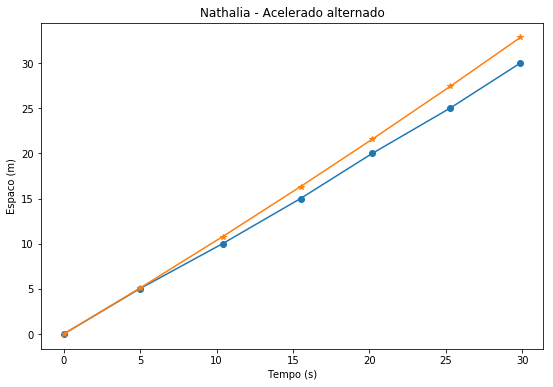

Erros: [0.0, 0.05969807201951571, 0.7779720961293837, 1.3192361645616124, 1.5721338750320086, 2.4074778264218963, 2.832829114904314]


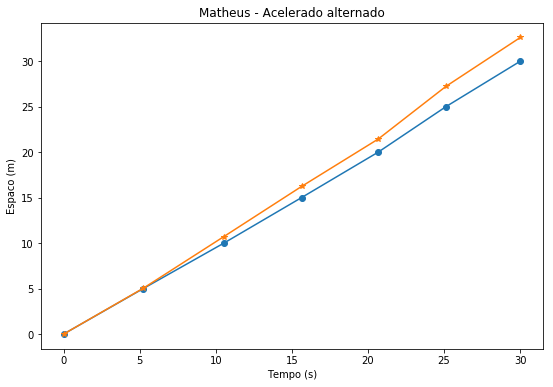

Erros: [0.0, 0.03417351073722141, 0.7192644555799195, 1.2243743669527944, 1.439675664082955, 2.2297691810331663, 2.610010076528283]


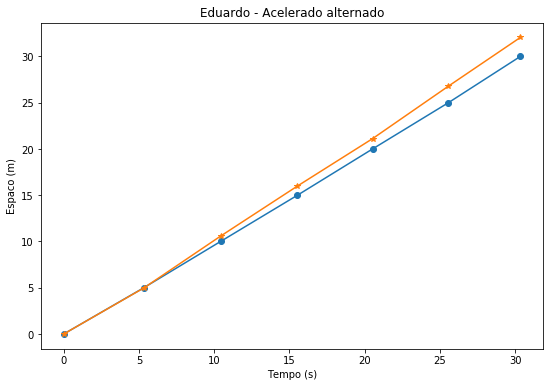

Erros: [0.0, 0.026203574671090024, 0.5780056586133249, 0.9930772575020939, 1.1133327398040826, 1.7876773604307594, 2.051438369993683]


In [136]:
ac_alt_dados = pd.read_csv('acelerado_alternado.csv', sep='\t', decimal=',')
titulos_ac_alt = ["Nathalia - Acelerado alternado", "Matheus - Acelerado alternado",
           "Eduardo - Acelerado alternado"]


actemp += plotar(ac_alt_dados, titulos_ac_alt, acelerado, True, vm_pessoa)

O sétimo bloco constrói os gráficos de velocidade por tempo com a aceleração média de cada membro do grupo que realizou a travessia utilizando a variável "actemp".

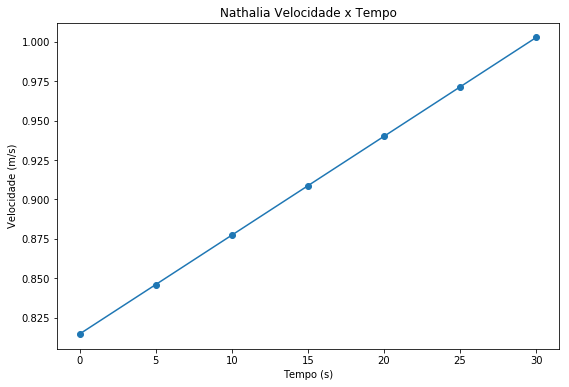

Aceleração média = 0.006268025366781958 m/s²


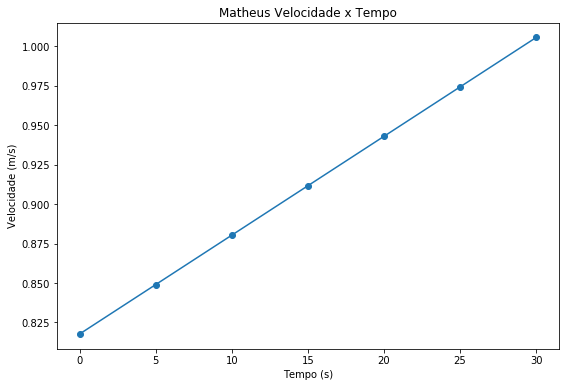

Aceleração média = 0.006268624468743573 m/s²


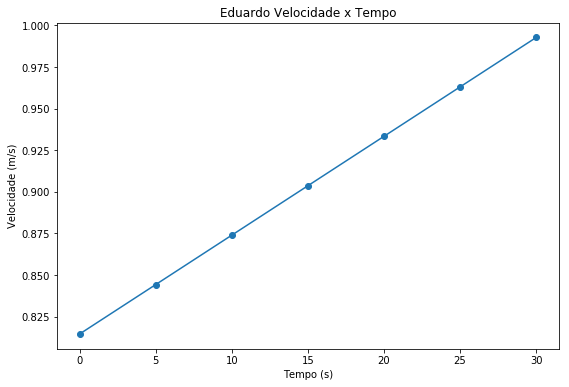

Aceleração média = 0.00593884516105024 m/s²


In [137]:
ac_pessoa = []
tempo = [0,5,10,15,20,25,30]

titulos_pessoa = ["Nathalia Velocidade x Tempo", "Matheus Velocidade x Tempo", "Eduardo Velocidade x Tempo"]

#calcula aceleração média
for i in range(len(titulos_pessoa)):
    temp = 0
    temp+=actemp[-(i+1)]
    for j in range(2):
        temp += actemp[j+2*i]
    ac_pessoa.append(temp/3)
    
v_pessoa = []

#calcula as velocidades
for i in range(len(titulos_pessoa)):
    for t in tempo:
        v_pessoa.append(vm_pessoa[i] + ac_pessoa[i]*t)
          
#plota os gráficos
for i in range(len(titulos_pessoa)):
    pyplot.rcParams["figure.figsize"] = [9,6]
    pyplot.figure(5)
    pyplot.xlabel('Tempo (s)')
    pyplot.ylabel('Velocidade (m/s)')
    pyplot.title(titulos_pessoa[i])
    pyplot.plot(tempo,v_pessoa[i*len(tempo):(i+1)*len(tempo)],marker='o')
    pyplot.show()
    print("Aceleração média = {} m/s²".format(ac_pessoa[i]))

O oitavo bloco constrói os gráficos de posição por tempo dos movimentos uniformemente acelerados. Este trecho de código não utiliza a função <span style="color: blue">plotar</span>(), pois não recebe os dados em forma de uma matriz e sim os obtêm de forma analítica apenas. São concluídos então os gráficos de movimento retilíneo uniformemente acelerado.

Podemos notar que a aceleração é tão pequena que precisamos utilizar tempos maiores para que a curva no gráfico se tornasse perceptível

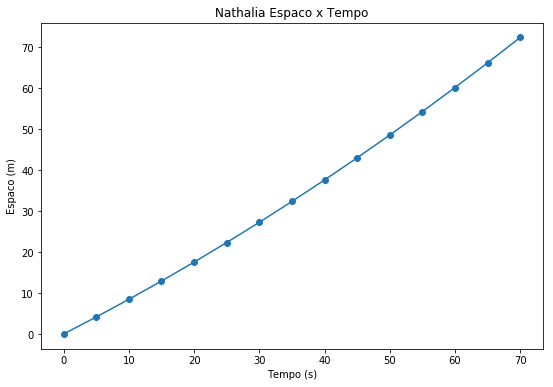

Velocidade média = 0.8146749839367718 m/s
Aceleração média = 0.006268025366781958 m/s²


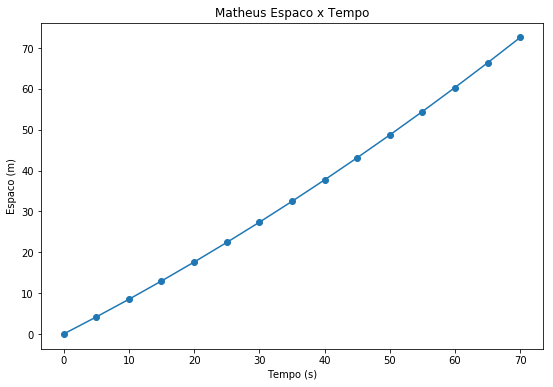

Velocidade média = 0.8176679283152634 m/s
Aceleração média = 0.006268624468743573 m/s²


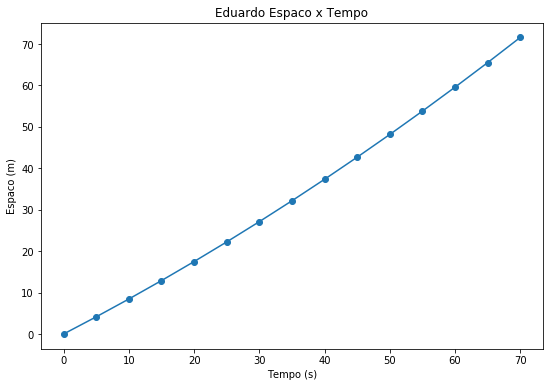

Velocidade média = 0.8145743659375081 m/s
Aceleração média = 0.00593884516105024 m/s²

Aceleração média de todos = 0.006158498332191924


In [138]:
tempo = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70]

titulos_pessoa = ["Nathalia Espaco x Tempo", "Matheus Espaco x Tempo", "Eduardo Espaco x Tempo"]
espaco_pessoa = []

for i in range(len(titulos_pessoa)):
    for t in tempo:
        espaco_pessoa.append(vm_pessoa[i]*t + 0.5*ac_pessoa[i]*t**2)

ac_todos = 0.0

for a in ac_pessoa:
    ac_todos +=a
    
ac_todos = ac_todos/3
for i in range(len(titulos_pessoa)):
    pyplot.rcParams["figure.figsize"] = [9,6]
    pyplot.figure(5)
    pyplot.xlabel('Tempo (s)')
    pyplot.ylabel('Espaco (m)')
    pyplot.title(titulos_pessoa[i])
    pyplot.plot(tempo,espaco_pessoa[i*len(tempo):(i+1)*len(tempo)],marker='o')
    pyplot.show()
    print("Velocidade média = {} m/s".format(vm_pessoa[i]))  
    print("Aceleração média = {} m/s²".format(ac_pessoa[i]))
    
print("")
print("Aceleração média de todos = {}".format(ac_todos))

## Análise - Movimento Retilíneo Uniformemente Variado

Para esta análise, será considerado novamente um valor de 1.8m, ou seja, 6% do percurso total, como o valor máximo de erro aceitável para as medidas de posição.

Considerando esse valor, podemos observar que, conforme houve o aumento da velocidade, todos os gráficos das medições de 10 em 10 metros exceto "Eduardo - Acelerado 2" ultrapassaram-no na última posição registrada. Já nos gráficos de medições alternadas, exceto "Eduardo - Acelerado alternado", todos tiveram os primeiros cinco pontos de medição com diferença dentro do valor aceitável de erro determinado. Isso indica que o método utilizado para simular o movimento retilíneo uniformemente variado foi razoavelmente preciso.

Entretanto, considerando que a aceleração média teórica que os membros do grupo deveriam alcançar era de 0.0067 m/s², (calculada pelo sistema abaixo), podemos perceber que as acelerações médias diferem 14.13% (Nathalia), 14.12% (Matheus) e 18.64% (Eduardo). Considerando o mesmo valor de erro médio definido anteriormente (3%), podemos concluir que a aceleração desenvolvida nenhum dos membros possui um valor aceitável. Ainda assim, vale notar que a relação entre as posições ideal e real foi considerada aceitável na maioria dos casos.

Essa imprecisão se torna mais relevante com um número maior de medições por travessia, como no experimento do MRU. Visto isso, podemos considerar que o fator de erro humano foi predominante em determinar esses resultados, algo que pode ser afirmado devido ao fato de que, teoricamente, acompanhar o aumento de bpm (*beats per minute*, ou batidas por minuto) do metrônomo com os passos deveria refletir na aceleração desejada. Esse desencontro de valores provavelmente se deve ao membros do grupo não conseguirem seguir com precisão suficiente as batidas que ouviram.

<center><b>Sistema para determinar a aceleração média (utilizando a velocidade média anterior e o fato de que a BPM dobra em 110s - o áudio possui 2mins mas o metrônomo começa a partir dos 10s):</b></center>
$$ v_f = 2*v_i \rightarrow \Delta v = v_i = 0.8 m/s $$
$$ a = \frac{0.8}{110} \rightarrow a = 0.0073 m/s^2 $$

<Talvez 9th mude pq precisa sobrepor?>

## Gráficos do Physics Toolbox

Finalmente, o nono bloco de código constrói os gráficos da resultante do acelerômetro do Physics Toolbox, utilizado durante todas as travessias.

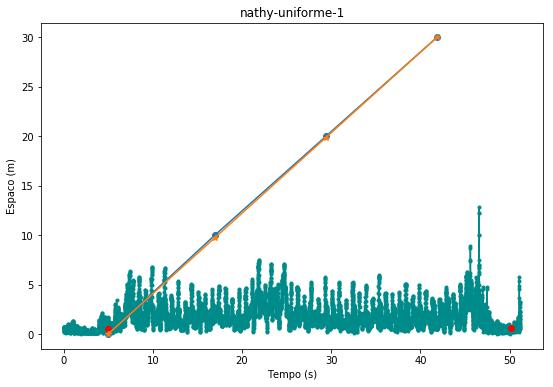

Erros: [0.0, 0.26190799294341005, 0.12484733342380139, 0.0]


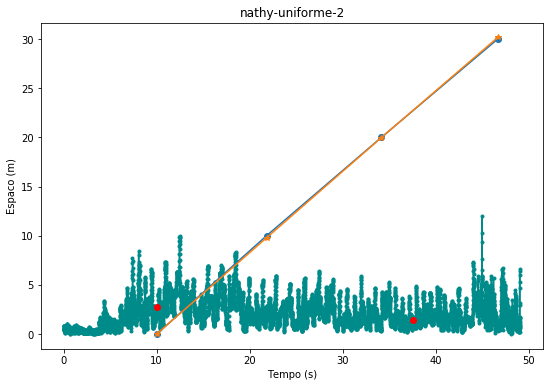

Erros: [0.0, 0.21009549795361515, 0.019099590723055115, 0.1596180081855394]


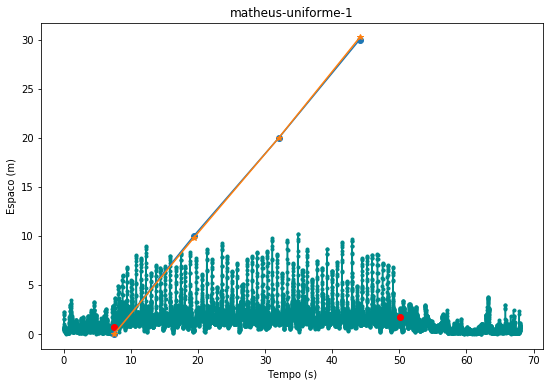

Erros: [0.0, 0.1927019270192698, 0.01640016400164157, 0.2132021320213191]


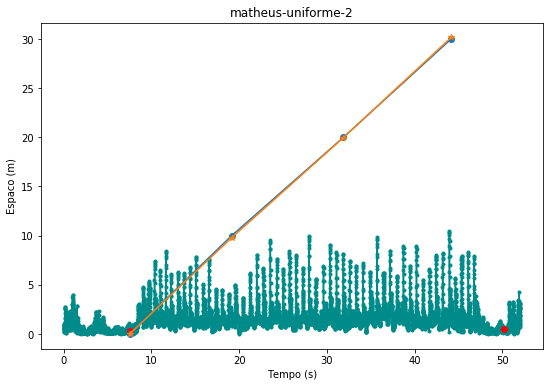

Erros: [0.0, 0.21143090983494695, 0.021825126176512555, 0.1555040240076373]


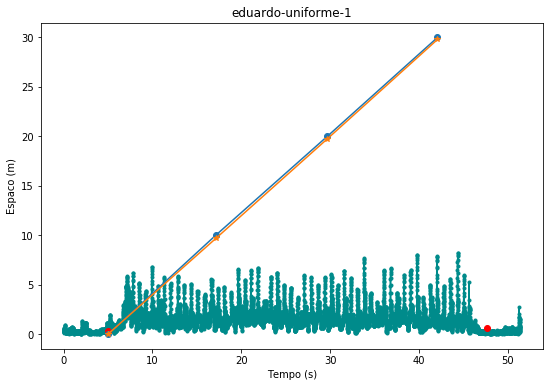

Erros: [0.0, 0.32753740396279696, 0.2587949858471461, 0.20218358269308467]


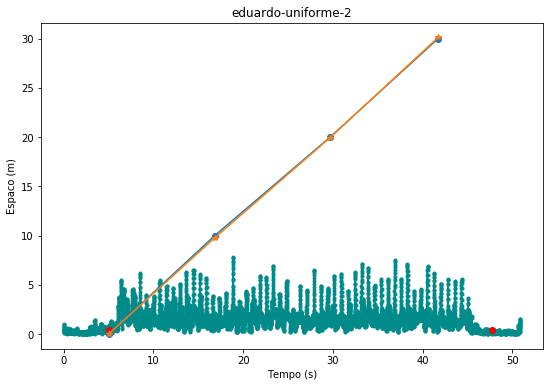

Erros: [0.0, 0.22210110369259972, 0.043602670663577925, 0.12263251124131358]


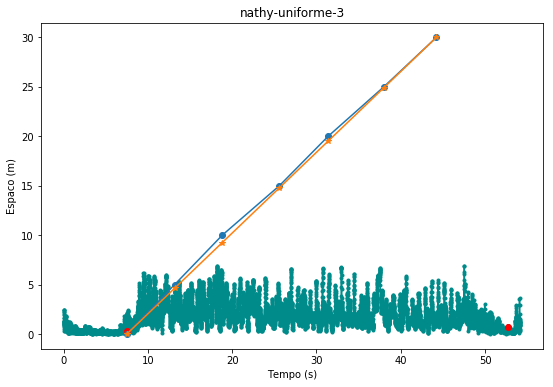

Erros: [0.0, 0.36512261580381455, 0.746594005449591, 0.21253405994550434, 0.4877384196185268, 0.09264305177111964, 0.0]


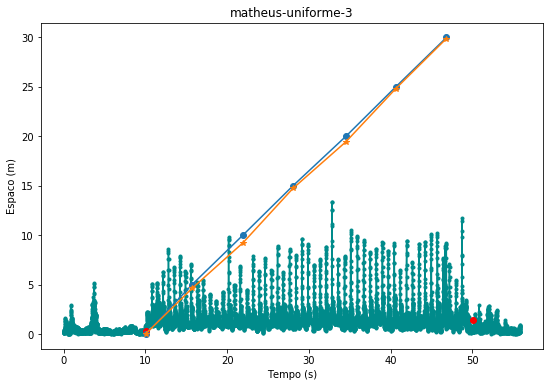

Erros: [0.0, 0.38148248710290567, 0.7792560412707026, 0.2647298398045077, 0.5566114580505008, 0.18055932663589758, 0.10589193592180024]


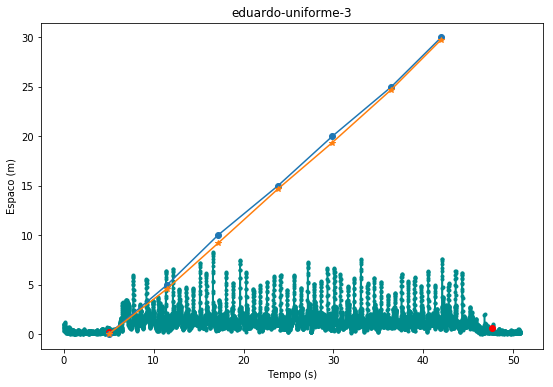

Erros: [0.0, 0.4002163331530548, 0.8166576527852882, 0.32449972958355744, 0.6354786371011336, 0.28123309897241455, 0.22714981070848594]


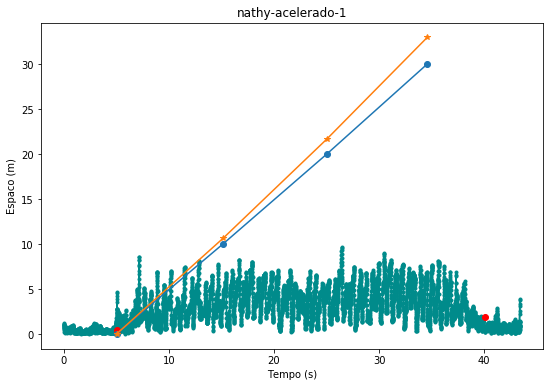

Erros: [0.0, 0.6216507694989861, 1.6619522332261738, 2.9631771123341935]


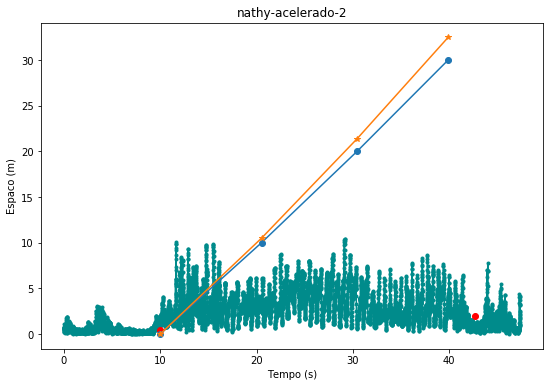

Erros: [0.0, 0.497396910405973, 1.3758803463408285, 2.482650244560425]


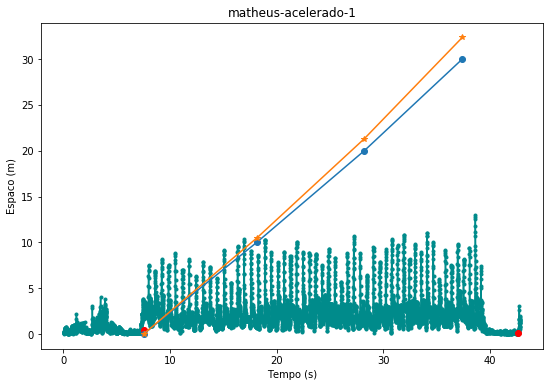

Erros: [0.0, 0.4718386755731174, 1.3088732661544356, 2.360087466961339]


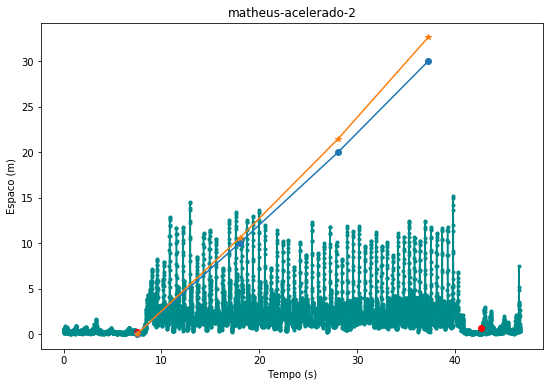

Erros: [0.0, 0.539535104110783, 1.464564507710186, 2.6214032426505014]


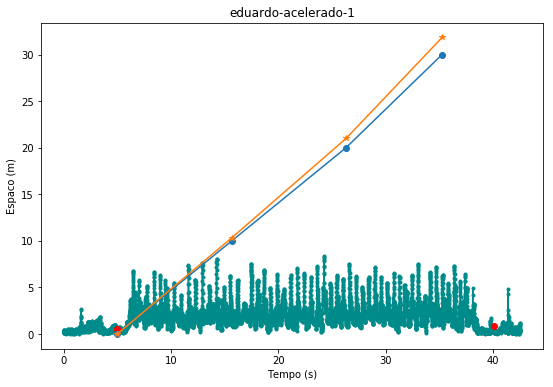

Erros: [0.0, 0.3283241993620667, 0.9878157354804777, 1.832266323807577]


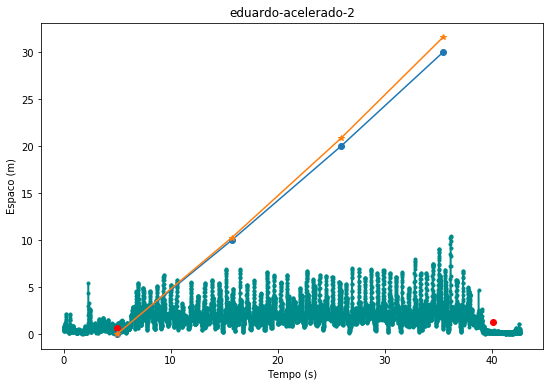

Erros: [0.0, 0.26720873093415776, 0.8477032597179672, 1.5976426850217749]


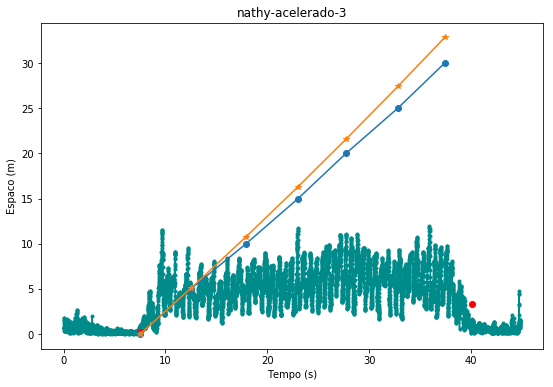

Erros: [0.0, 0.05969807201951571, 0.7779720961293837, 1.3192361645616124, 1.5721338750320086, 2.4074778264218963, 2.832829114904314]


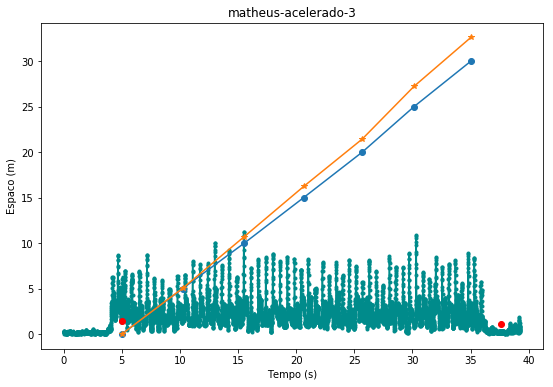

Erros: [0.0, 0.03417351073722141, 0.7192644555799195, 1.2243743669527944, 1.439675664082955, 2.2297691810331663, 2.610010076528283]


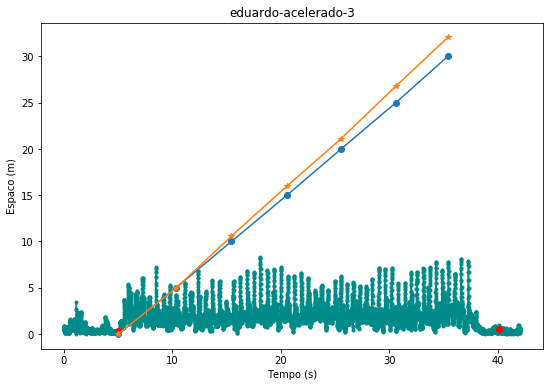

Erros: [0.0, 0.026203574671090024, 0.5780056586133249, 0.9930772575020939, 1.1133327398040826, 1.7876773604307594, 2.051438369993683]


[0.006350090689616641, 0.006164338347350257, 0.0056402684049188375]

In [139]:
titulos = ["nathy-uniforme-1","nathy-uniforme-2",
           "matheus-uniforme-1", "matheus-uniforme-2",
           "eduardo-uniforme-1", "eduardo-uniforme-2"]
dados = pd.read_csv('uniforme.csv', sep='\t', decimal=',')

plotar(dados, titulos, uniforme, False,0,True)

titulos = ["nathy-uniforme-3",
           "matheus-uniforme-3",
           "eduardo-uniforme-3"]
dados = pd.read_csv('uniforme_alternado.csv', sep='\t', decimal=',')

plotar(dados, titulos, uniforme, True,0,True)

titulos = ["nathy-acelerado-1","nathy-acelerado-2",
           "matheus-acelerado-1", "matheus-acelerado-2",
           "eduardo-acelerado-1", "eduardo-acelerado-2"]
dados = pd.read_csv('acelerado.csv', sep='\t', decimal=',')

plotar(dados, titulos, acelerado, False,vm_pessoa,True)

titulos = ["nathy-acelerado-3",
           "matheus-acelerado-3",
           "eduardo-acelerado-3"]
dados = pd.read_csv('acelerado_alternado.csv', sep='\t', decimal=',')

plotar(dados, titulos, acelerado, True,vm_pessoa,True)


## Considerações Finais

Analisando os resultados finais, podemos perceber que houve sucesso maior em simular o movimento retilíneo uniforme, em comparação à simulação para o movimento retilíneo uniformemente variado. Entretanto, a simulação do MRUV não foi completamente disfuncional, visto que houve aceleração, porém não tão alta quanto a esperada.

Nesse âmbito, podemos perceber a eficácia dos modelos que calculam os valores ideais. No caso do modelo do MRU, houve pouca discrepância entre a realidade e o modelo, sendo relativamente simples a simulação. Já no caso do modelo do MRUV, que trabalha com valores exponenciais, a discrepância entre a realidade e os valores ideais foi mais clara, além do fato de que simular essa situação foi um trabalho mais complexo.

Um resultado interessante que pode ser observado, associado ao erro humano que deve ser levado em conta, é o fato de que os valores de erro terem sinais diferentes nos casos do MRU e do MRUV. Durante o MRU, a posição ideal calculada era geralmente menor do que a posição real obtida no experimento, enquanto no MRUV a posição ideal calculada era geralmente maior do que a posição real obtida no experimento.

Opções interessantes para considerar em um experimento semelhante no futuro seriam realizá-lo com uma distância total maior e com acelerações maiores, permitindo perceber melhor onde exatamente ocorre a perda de precisão do problema. Aumentar o número de cronômetros, tanto em geral como por marcação, também são questões a serem consideradas.

Finalmente, é interessante notar que o experimento trouxe para o grupo uma maior noção da realidade, pois percebemos que até uma simulação relativamente simples, como a de um movimento retilíneo uniforme, pode trazer diversos fatores que devem ser considerados na realidade, como a forma de registro dos dados, os intervalos para obtenção de dados e o próprio fator de erro humano.

## Vídeo do experimento

https://www.youtube.com/watch?v=LiL270vYSQQ

## Contribuições dos autores

Eduardo Nascimento foi responsável por fornecer a fita métrica, medir os tempos durante o experimento, realizar as travessias e escrever parte do código que gera os gráficos do acelerômetro e auxiliar no processo de verificação do código.

Gabriel Massukado foi responsável por filmar, medir os tempos durante o experimento, escrever os relatórios e análises e auxiliar no processo de verificação do código. 

Larissa Goto foi responsável por filmar, medir os tempos durante o experimento e organizar e editar o vídeo do trabalho. 

Nathalia Borin foi responsável por medir os tempos durante o experimento, realizar as travessias e escrever o código que gera os gráficos. 

Matheus Lima foi responsável por medir os tempos durante o experimento, realizar as travessias e auxiliar no processo de verificação do código. 

Todos os autores escreveram e revisaram esse artigo. Todos os autores leram e aprovaram a versão final desse artigo.